# STGCN Ver2

## ref
- <https://github.com/miruetoto/yechan3/tree/main/posts/3_Researches/ITSTGCN/itstgcn>
- <https://miruetoto.github.io/yechan3/posts/3_Researches/ITSTGCN/2023-03-18-SimulationPlanner-Tutorial.html#plnr_gnar_block>

## 2022/06/01 ~ 2022/09/15

- train 2022-06-01 00:00:00 ~ 2022-08-14 17:00:00
- test 2022-08-14 18:00:00 ~ 2022-09-15 23:00:00

## Import

In [1]:
import eptstgcn
import torch
import eptstgcn.planner

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
url = "https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data2/stgcn_data2.json"
loader = eptstgcn.DatasetLoader(url)
dataset = loader.get_dataset(lags=4)

In [3]:
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset, train_ratio = 0.7)

## LRNR

- ref: <https://seoyeonc.github.io/blog/posts/GCN/2023-03-17-ITSTGCN-Tutorial.html>

In [4]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'data2(2022/06/01 ~ 2022/09/15)')

In [5]:
lrnr.learn(filters=32, epoch=100)

In [6]:
import pickle 
with open('./lrnr_model/stgcn_ver2_data2_cancel_normal_100epoch.pickle','wb') as fw:
    pickle.dump(lrnr, fw)

In [7]:
import pickle 
with open('./lrnr_model/stgcn_ver2_data2_cancel_normal_100epoch.pickle', 'rb') as f: 
    model = pickle.load(f)

## Visualization

In [8]:
evtor = eptstgcn.Evaluator(model, train_dataset, test_dataset)

In [11]:
# fig = evtor.plot('--', label='observed data')
# fig.tight_layout()
# fig

### train

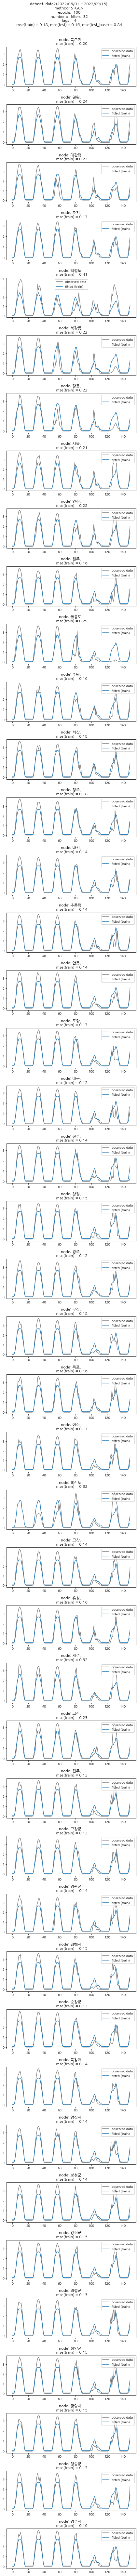

In [12]:
evtor.tr_plot(t=150, label='observed data')

### test

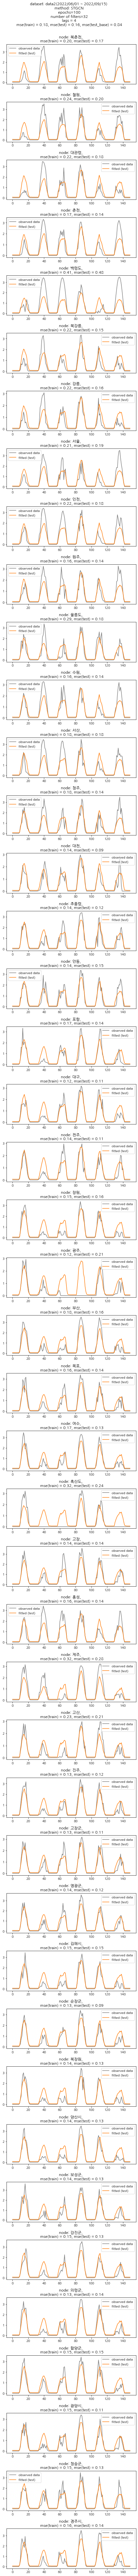

In [13]:
evtor.test_plot(t=150, label='observed data')

## Simulation

In [4]:
plans_stgcn = {
    'max_iteration': 30, 
    'method': ['EPT-STGCN'], 
    'lags': [4], 
    'nof_filters': [32], 
    'epoch': [100]
}

In [5]:
plnr = eptstgcn.planner.PLNR_STGCN(plans_stgcn,loader,dataset_name='data2')

In [6]:
plnr.simulate()

1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-04-27_12-15-15.csv


In [7]:
import pickle
with open('./simul_model/stgcn_ver2_data2_cancel_normal_100epoch.pickle', 'wb') as fw:
    pickle.dump(plnr, fw)

In [8]:
with open('./simul_model/stgcn_ver2_data2_cancel_normal_100epoch.pickle', 'rb') as f:
    simul_model = pickle.load(f)

In [9]:
df_simul_no = simul_model.simulation_results
df_simul_no

dataset     method lags nof_filters epoch mse(train) mse(test)  \
0    data2  EPT-STGCN    4          32   100   0.184624  0.166554   
1    data2  EPT-STGCN    4          32   100   0.191821  0.174335   
2    data2  EPT-STGCN    4          32   100   0.189864  0.172401   
3    data2  EPT-STGCN    4          32   100   0.184429  0.165976   
4    data2  EPT-STGCN    4          32   100   0.195412  0.179954   
5    data2  EPT-STGCN    4          32   100   0.189516  0.167228   
6    data2  EPT-STGCN    4          32   100   0.193522  0.173043   
7    data2  EPT-STGCN    4          32   100   0.191042  0.175756   
8    data2  EPT-STGCN    4          32   100   0.190697  0.173998   
9    data2  EPT-STGCN    4          32   100   0.192474  0.176019   
10   data2  EPT-STGCN    4          32   100   0.190868  0.171752   
11   data2  EPT-STGCN    4          32   100   0.190033  0.171047   
12   data2  EPT-STGCN    4          32   100   0.190472  0.172028   
13   data2  EPT-STGCN    4          32   100    0.19148  0.175484   
14   data2  EPT-STGCN    4          32   100    0.19964  0.184739   
15   data2  EPT-STGCN    4          32   100   0.182046  0.164116   
16   data2  EPT-STGCN    4          32   100   0.184723  0.165917   
17   data2  EPT-STGCN    4          32   100    0.20017  0.184031   
18   data2  EPT-STGCN    4          32   100    0.20381  0.189657   
19   data2  EPT-STGCN    4          32   100   0.190219  0.172672   
20   data2  EPT-STGCN    4          32   100   0.185853  0.165922   
21   data2  EPT-STGCN    4          32   100   0.206896  0.190757   
22   data2  EPT-STGCN    4          32   100   0.191237  0.174569   
23   data2  EPT-STGCN    4          32   100    0.19208  0.175278   
24   data2  EPT-STGCN    4          32   100   0.190018  0.174164   
25   data2  EPT-STGCN    4          32   100   0.194303  0.178379   
26   data2  EPT-STGCN    4          32   100   0.191164  0.175594   
27   data2  EPT-STGCN    4          32   100    0.19249  0.175679   
28   data2  EPT-STGCN    4          32   100   0.194278  0.179537   
29   data2  EPT-STGCN    4          32   100    0.19047  0.174702   

   calculation_time  
0        806.291872  
1        809.761688  
2        812.575872  
3        813.223254  
4        813.411208  
5        802.375919  
6        805.097764  
7        811.814163  
8        863.916972  
9        874.849521  
10      1087.609615  
11      1025.377339  
12      1041.937325  
13      2193.973796  
14      2024.050035  
15      2261.503337  
16      2353.211124  
17      2246.013008  
18      2153.198691  
19      2594.615245  
20      2058.042647  
21      2394.984007  
22      2212.408073  
23      2294.681623  
24      2555.400719  
25      2388.160844  
26      2372.384897  
27      2252.741733  
28      2190.178894  
29      2534.951102

In [12]:
df_simul_no['mse(test)'].mean()

0.17470959573984146

In [10]:
print('stgcn ver2 100에폭 끝')

stgcn ver2 100에폭 끝


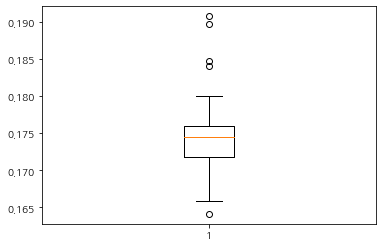

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(df_simul_no['mse(test)'])
plt.show()